# Making Decision Tree Classification

In [59]:
 import numpy as np
import matplotlib.pyplot as plt
 import pandas as pd

In [60]:
dataset = pd.read_csv(r'C:\Users\HP\Downloads\Machine Learning\27 june decision tree - Copy\Social_Network_Ads.csv')

In [61]:
x =dataset.iloc[:,[2,3]].values
y = dataset.iloc[:, -1].values

In [62]:
# Spelitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state= 0)


In [63]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_test)
x_test = sc.transform(x_test)

In [64]:
# Training The Decision Tree Classifier ,model on the Test
from sklearn.tree import DecisionTreeClassifier
Classifier = DecisionTreeClassifier()
Classifier.fit(x_test, y_test)


DecisionTreeClassifier()

In [65]:
y_pred = Classifier.predict(x_test)

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[58  0]
 [ 0 22]]


In [67]:

#  To check the accuracy score
from sklearn.metrics import accuracy_score
ac = accuracy_score(y_test, y_pred)
print(ac)

1.0


In [68]:
bias = Classifier.score(x_test, y_test)
bias

1.0

In [69]:
variance = Classifier.score(x_test, y_test)
variance

1.0

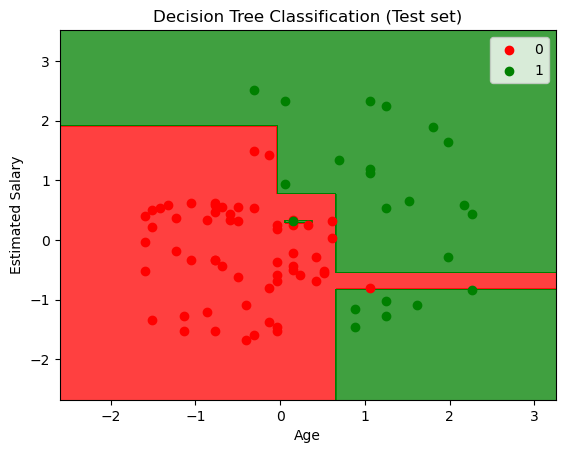

In [83]:
# Visualing the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, Classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

(80, 2)
(320,)
int64


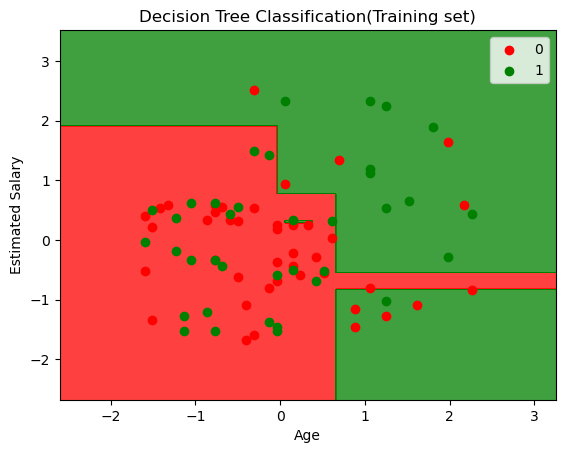

In [91]:
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, y_train 
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min() -1, stop = x_set[:,0].max() +1, step = 0.01),
                    np.arange(start = x_set[:,1].min() -1, stop = x_set[:,1].max() +1, step = 0.01))
plt.contourf(X1 ,X2, Classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())


# Assuming x_set is your feature array and y_set is your cluster labels array

# Verify the dimensions and data types
print(x_set.shape)  # Make sure it is a 2-dimensional array
print(y_set.shape)  # Verify the shape corresponds to the number of data points

print(y_set.dtype)  # Verify the data type of y_set
# Reshape y_set to match the number of data points
y_set = np.resize(y_set, x_set.shape[0])


# Convert y_set to integer type if necessary
y_set = y_set.astype(int)

# Create a list to store the legend labels
legend_labels = []

# Plot the clusters
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = [ListedColormap(('red', 'green'))(i)], label=j)

    legend_labels.append(j)
plt.title('Decision Tree Classification(Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')

# Check if any data points were plotted
if len(legend_labels) > 0:
    plt.legend()
plt.show()
